# 09: VISUALIZACIÓN DE DATOS MEDIANTE PLOTS

In [1]:
import pandas as pd
import os

In [2]:
# importamos datos

raiz = r"C:\Users\Usuario\Documents\05_Formación_Académica\Marc\Data_Science\machine_learning\Recursos_curso\datasets"
fichero = r"customer-churn-model\Customer Churn Model.txt"
ruta = os.path.join(raiz, fichero) 
data = pd.read_csv(ruta)

In [3]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### Scatterplot (Nuve de dispersion)

<Axes: xlabel='Night Mins', ylabel='Night Charge'>

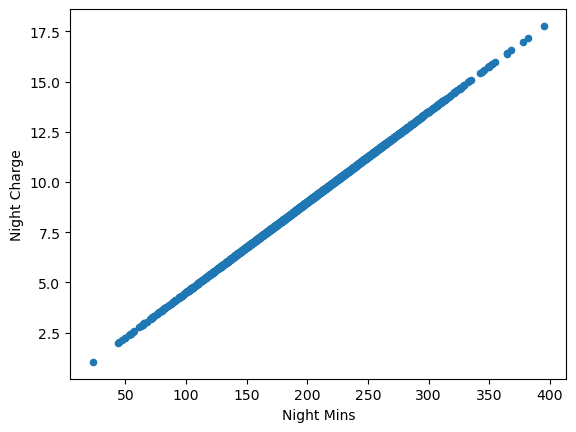

In [3]:
# Visualización de un scatterplot simple de los minutos de llmamada en la noche VS carga del telefono en la noche

data.plot(kind = 'scatter', # Especificamos el tipo de plot que queremos visualizar
          x = 'Night Mins',
          y = 'Night Charge')

###### Con este plot vemos rapidamente que hay una relacion lineal entre estas dos variables

<Axes: xlabel='Day Mins', ylabel='Night Mins'>

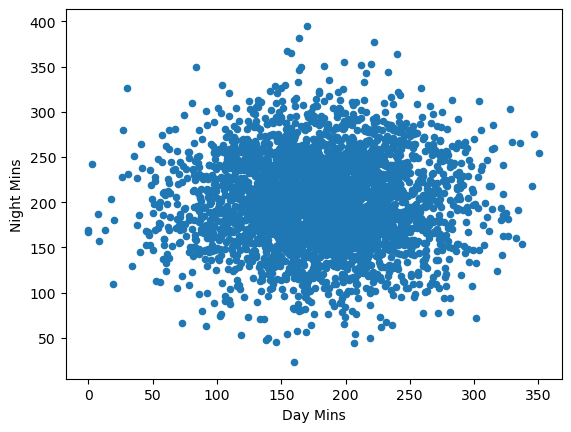

In [4]:
data.plot(kind = 'scatter',
          x = 'Day Mins',
          y = 'Night Mins')

###### Con este plot vemos rapidamente que NO hay una relación aparente entre estas dos variables

### Visualizar varios plots en un mismo plot (SUBPLOTS) 

In [5]:
# Necesitamos la sublibreria pyplot de matplotlib

import matplotlib.pyplot as plt

<Axes: xlabel='Night Mins', ylabel='Night Charge'>

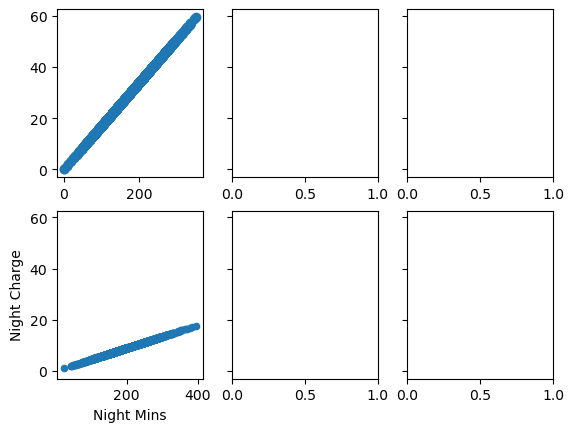

In [6]:
# Crear una estructura donde poner los subplots

figura, axis = plt.subplots(2, 3, # es muy importante poner lo de 'axis' (o como se le quiera llamar) ya que es esencial para luego ver donde ponemos cada subplot que va a ser de 2x2 como definimos
                           sharey = True, # establece que el eje y tenga una escala comun en todos los plots
                           sharex = False) # estables que el eje x tenga una escala independiente

# Primera forma de establecer lo que poner en un subplot, en este caso, en la posición 0,0

axis[0, 0].scatter(data['Day Mins'], data['Day Charge']) # podemos especificar el tipo de plot en forma de función

# Segunda forma de establecer lo que poner en un subplot, en este caso, en la posición 1,0

data.plot(kind = 'scatter', 
          x = 'Night Mins', y = 'Night Charge', 
          ax = axis[1][0]) # esto último se ha de poner para establecer la posición del subplot

### Histogramas de frecuencias

(array([2.000e+00, 1.000e+00, 1.900e+01, 1.160e+02, 4.690e+02, 9.170e+02,
        1.055e+03, 5.540e+02, 1.790e+02, 2.100e+01]),
 array([  0. ,  16.5,  33. ,  49.5,  66. ,  82.5,  99. , 115.5, 132. ,
        148.5, 165. ]),
 <BarContainer object of 10 artists>)

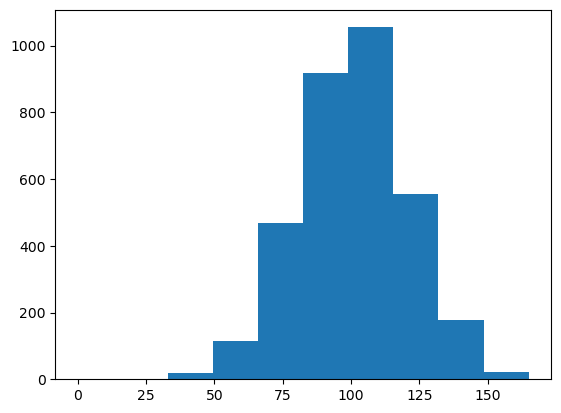

In [14]:
# Se utiliza de nuevo la libreria pyplot

plt.hist(data['Day Calls'])


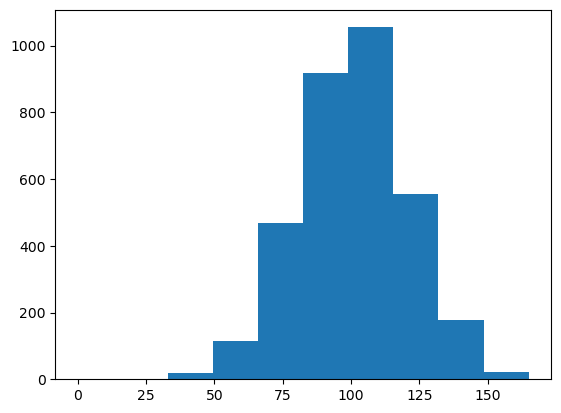

In [18]:
# Si no quiero que antes del plot salga toda esa información de array

plt.hist(data['Day Calls'])

%matplotlib inline # se pone esta línea para de código para que no salga todo ese textaco

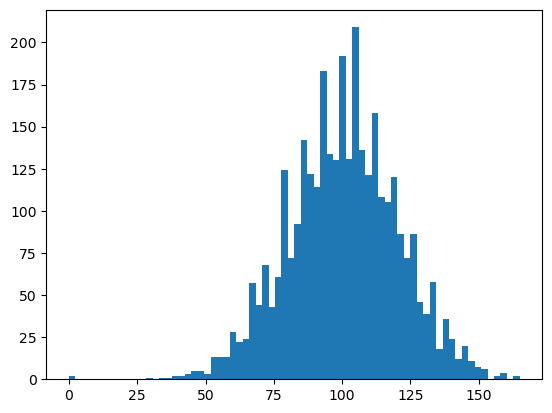

In [20]:
# Espaciar el histograma

plt.hist(data['Day Calls'], 
         bins = 70) # esto va a hacer que se separe mas en el eje x por que aumenta el numero de subdivisiones

%matplotlib inline

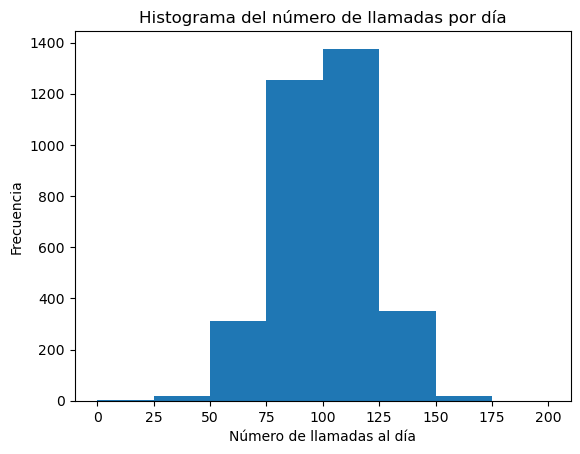

In [25]:
# Añadir titulo y nombre a los ejes del plot

plt.hist(data['Day Calls'], 
         bins = [0, 25, 50, 75, 100, 125, 150, 175, 200]) # tambien se puede pasar una lista
plt.xlabel('Número de llamadas al día')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de llamadas por día')

%matplotlib inline

#### Determinar el número apropiado de divisiones del histograma (Regla de Sturges)

###### Sturges = 1 + log2(N)

In [32]:
# Necesitamos la libreria Numpy para utilizar el logaritmo en base 2

import numpy as np

N = data.shape[0] # saco el número de filas del dataframe
sturges = 1 + np.log2(N)
sturges

12.702605602110248

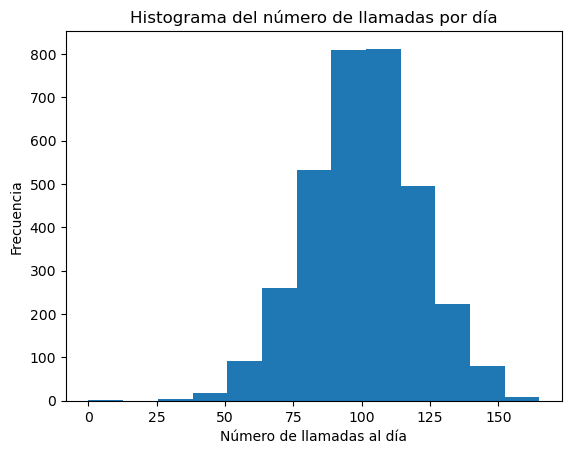

In [34]:
plt.hist(data['Day Calls'], 
         bins = int(np.ceil(sturges))) # se pone int() porque no puede ser un valor float, y e pone np.ceil() para redondear a la alza el numero decimal
plt.xlabel('Número de llamadas al día')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de llamadas por día')

%matplotlib inline

### Boxplots

###### Conceptos de los boxplots:
- La caja equivale a los datos entre el cuartil 25 y el cuartil 75, por lo que se conoce por la distancia intercuartil
- La línea de en medio de la caja equivale al cuartil 50
- Lo que hay encima de la caja equivale a los datos entre el cuartil 75 y el cuartil 100, y lo que hay debajo entre el cuartil 0 y el cuartil 25
- Los 'bigotes' representan 1.5 veces la distancia intercuartil por arriba y por abajo
- Los redondas por encima o por debajo de los 'bigotes' se conocen como valer outlayers, es decir, valores extremos

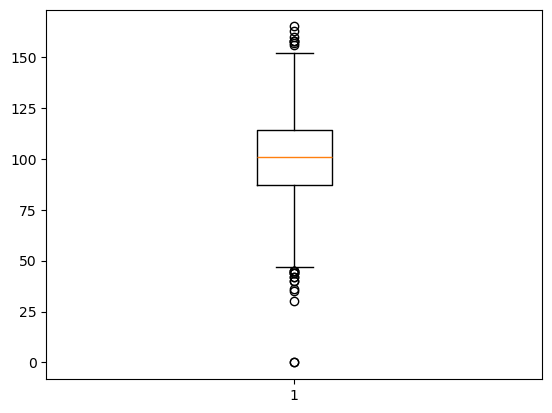

In [36]:
# Realizar el boxplot

plt.boxplot(data['Day Calls'])
%matplotlib inline

In [37]:
# Comprobar los cuartiles

q_25 = data['Day Calls'].quantile(0.25)
q_50 = data['Day Calls'].quantile(0.50)
q_75 = data['Day Calls'].quantile(0.75)

print(f'El cuartil 25 es {q_25}, el 50 es {q_50} y el 75 es {q_75}')

El cuartil 25 es 87.0, el 50 es 101.0 y el 75 es 114.0


In [39]:
# Comprobar la distancia intercuartil

distancia_intercuartil = q_75 - q_25
distancia_intercuartil

27.0

In [40]:
# Comprobar la distancia de los bigotes

bigote_arriba = q_75 + (distancia_intercuartil * 1.5)
bigote_abajo = q_25 - (distancia_intercuartil * 1.5)

print(f'La distancia de los bigotes es {bigote_abajo} por abajo y {bigote_arriba} por arriba')

La distancia de los bigotes es 46.5 por abajo y 154.5 por arriba


### Guardar un plot

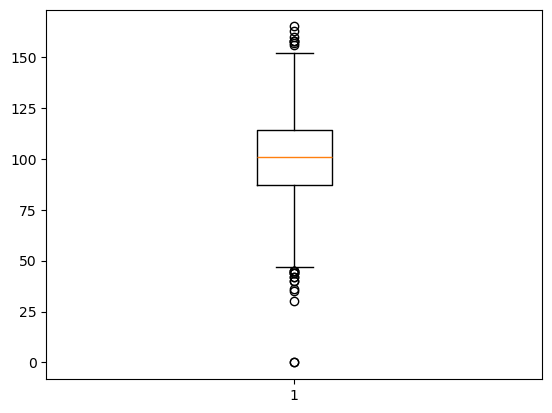

In [8]:
root = r"C:\Users\Usuario\Documents\05_Formación_Académica\Marc\Data_Science\machine_learning\Ficheros_creados"
imagen = r"Boxplot.jpeg"
ruta_imagen = os.path.join(root, imagen) 

plt.boxplot(data['Day Calls'])
plt.savefig(ruta_imagen)